In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from scipy.stats import gaussian_kde
from matplotlib.colors import LinearSegmentedColormap

# Loading data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\climate_data_complete.parquet"

In [3]:
df = pd.read_parquet(path)
df.shape

(470320, 171)

In [4]:
ecoregions_cols = ['Level_1', 'Level_2', 'Level_3', 'Level_4', 'ECO_NAME']

In [5]:
for i in ecoregions_cols:
    df[i] = df[i].astype(str)

In [6]:
df.Level_1.value_counts()

Level_1
8  EASTERN TEMPERATE FORESTS          147066
9  GREAT PLAINS                       137052
10  NORTH AMERICAN DESERTS             84567
6  NORTHWESTERN FORESTED MOUNTAINS     52764
5  NORTHERN FORESTS                    24177
11  MEDITERRANEAN CALIFORNIA            9499
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5596
12  SOUTHERN SEMIARID HIGHLANDS         2362
15  TROPICAL WET FORESTS                1101
Name: count, dtype: int64

In [7]:
level3_deserts = df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].Level_3.value_counts().head(10).index.to_list()

In [8]:
df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].Level_3.value_counts().head(10)

Level_3
10.1.5  Central Basin and Range       18702
10.1.3  Northern Basin and Range       8960
10.2.4  Chihuahuan Desert              8882
10.1.7  Arizona/New Mexico Plateau     8618
10.1.4  Wyoming Basin                  8366
10.1.6  Colorado Plateaus              8015
10.2.1  Mojave Basin and Range         7448
10.2.2  Sonoran Desert                 6506
10.1.2  Columbia Plateau               5638
10.1.8  Snake River Plain              3432
Name: count, dtype: int64

In [9]:
df[df.Level_2 == '10.1  COLD DESERTS'].Level_3.value_counts()

Level_3
10.1.5  Central Basin and Range       18702
10.1.3  Northern Basin and Range       8960
10.1.7  Arizona/New Mexico Plateau     8618
10.1.4  Wyoming Basin                  8366
10.1.6  Colorado Plateaus              8015
10.1.2  Columbia Plateau               5638
10.1.8  Snake River Plain              3432
Name: count, dtype: int64

In [10]:
df[df.Level_2 == '10.2  WARM DESERTS'].Level_3.value_counts()

Level_3
10.2.4  Chihuahuan Desert         8882
10.2.1  Mojave Basin and Range    7448
10.2.2  Sonoran Desert            6506
Name: count, dtype: int64

# PCA

In [12]:
ecoregions = pd.DataFrame(df[ecoregions_cols])

In [13]:
df = pd.DataFrame(df[df.Level_1 == '10  NORTH AMERICAN DESERTS'].reset_index(drop=True))
df.shape

(84567, 171)

In [14]:
df.drop(columns = ['latitude', 'longitude'], inplace = True)
X = df.select_dtypes(include="number")
X.shape

(84567, 161)

In [15]:
env_vars = ['jan_tmin', 'feb_tmin', 'mar_tmin', 'apr_tmin', 'may_tmin', 'jun_tmin', 
            'jul_tmin', 'aug_tmin', 'sep_tmin', 'oct_tmin', 'nov_tmin', 'dec_tmin', 'annual_tmin',
            'jan_meant', 'feb_meant', 'mar_meant', 'apr_meant', 'may_meant', 'jun_meant',
            'jul_meant', 'aug_meant', 'sep_meant', 'oct_meant', 'nov_meant', 'dec_meant', 'annual_meant',
            'jan_maxt', 'feb_maxt', 'mar_maxt', 'apr_maxt', 'may_maxt', 'jun_maxt',
            'jul_maxt', 'aug_maxt', 'sep_maxt', 'oct_maxt', 'nov_maxt', 'dec_maxt', 'annual_maxt',
            'jan_dptmean', 'feb_dptmean', 'mar_dptmean', 'apr_dptmean', 'may_dptmean', 'jun_dptmean',
            'jul_dptmean', 'aug_dptmean', 'sep_dptmean', 'oct_dptmean', 'nov_dptmean', 'dec_dptmean', 'annual_dptmean',
            'jan_solar', 'feb_solar', 'mar_solar', 'apr_solar', 'may_solar', 'jun_solar',
            'jul_solar', 'aug_solar', 'sep_solar', 'oct_solar', 'nov_solar', 'dec_solar', 'annual_solar',
            'jan_solarTrans', 'feb_solarTrans', 'mar_solarTrans', 'apr_solarTrans', 'may_solarTrans', 'jun_solarTrans', 
            'jul_solarTrans', 'aug_solarTrans', 'sep_solarTrans', 'oct_solarTrans', 'nov_solarTrans', 'dec_solarTrans', 'annual_solarTrans', 
            'jan_precip', 'feb_precip', 'mar_precip', 'apr_precip', 'may_precip', 'jun_precip',
            'jul_precip', 'aug_precip', 'sep_precip', 'oct_precip', 'nov_precip', 'dec_precip', 'annual_precip',
            'jan_vpdmax', 'feb_vpdmax', 'mar_vpdmax', 'apr_vpdmax', 'may_vpdmax', 'jun_vpdmax',
            'jul_vpdmax', 'aug_vpdmax', 'sep_vpdmax', 'oct_vpdmax', 'nov_vpdmax', 'dec_vpdmax', 'annual_vpdmax',
            'jan_vpdmin', 'feb_vpdmin', 'mar_vpdmin', 'apr_vpdmin', 'may_vpdmin', 'jun_vpdmin',
            'jul_vpdmin', 'aug_vpdmin', 'sep_vpdmin', 'oct_vpdmin', 'nov_vpdmin', 'dec_vpdmin', 'annual_vpdmin',
            'elevation', 'usda_hardiness_temp']

In [16]:
bio_vars = ['BIO1_AnnualMeanTemp', 'BIO2_MeanDiurnalRange', 'BIO5_MaxTempWarmestMonth', 
            'BIO6_MinTempColdestMonth', 'BIO7_TemperatureAnnualRange', 'BIO3_Isothermality', 
            'BIO4_TemperatureSeasonality', 'BIO8_MeanTempWettestQuarter', 'BIO9_MeanTempDriestQuarter', 
            'BIO10_MeanTempWarmestQuarter', 'BIO11_MeanTempColdestQuarter', 'BIO12_AnnualPrecip', 
            'BIO13_PrecipWettestMonth', 'BIO14_PrecipDriestMonth', 'BIO15_PrecipSeasonality', 
            'BIO16_PrecipWettestQuarter', 'BIO17_PrecipDriestQuarter', 'BIO18_PrecipWarmestQuarter', 
            'BIO19_PrecipColdestQuarter', 'elevation', 'usda_hardiness_temp'] 

In [17]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns

(84567, 14)
0.9904454895521565


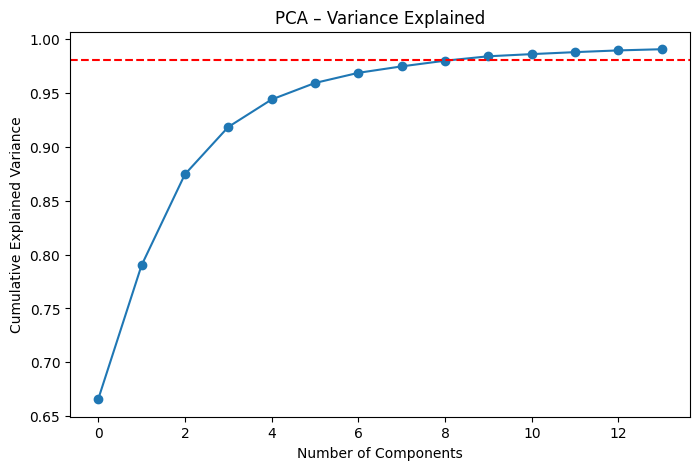

In [18]:
pca_env = PCA(n_components=0.99, random_state=42)
X_pca_env = pca_env.fit_transform(X_scaled[env_vars])
print(X_pca_env.shape)
print(pca_env.explained_variance_ratio_.sum())
X_pca_env = pd.DataFrame(X_pca_env)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_env.explained_variance_ratio_), marker='o')
plt.axhline(0.98, color='red', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.show()

(84567, 10)
0.9920371531871878


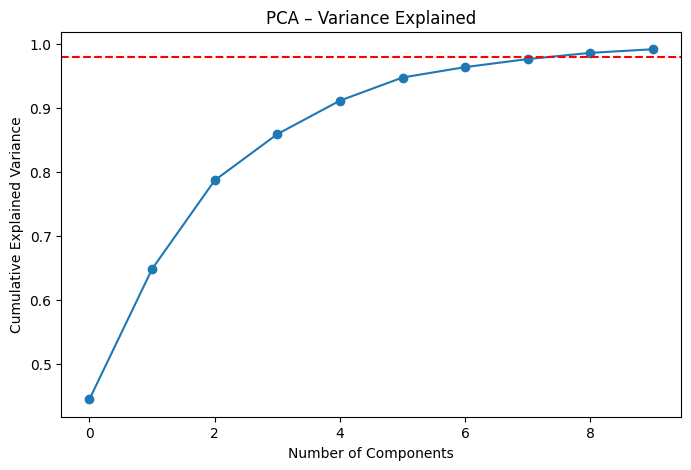

In [19]:
pca_bio = PCA(n_components=0.99, random_state=42)
X_pca_bio = pca_bio.fit_transform(X_scaled[bio_vars])
print(X_pca_bio.shape)
print(pca_bio.explained_variance_ratio_.sum())
X_pca_bio = pd.DataFrame(X_pca_bio)

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_bio.explained_variance_ratio_), marker='o')
plt.axhline(0.98, color='red', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Explained")
plt.show()

In [20]:
X_pca_env = pd.concat([X_pca_env, ecoregions], axis=1)
X_pca_bio = pd.concat([X_pca_bio, ecoregions], axis=1)

In [21]:
X_pca_env.columns[:-5]

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='object')

In [22]:
X_pca_bio.columns[:-5]

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='object')

# Level 3 North American Deserts

In [23]:
level3_deserts

['10.1.5  Central Basin and Range',
 '10.1.3  Northern Basin and Range',
 '10.2.4  Chihuahuan Desert',
 '10.1.7  Arizona/New Mexico Plateau',
 '10.1.4  Wyoming Basin',
 '10.1.6  Colorado Plateaus',
 '10.2.1  Mojave Basin and Range',
 '10.2.2  Sonoran Desert',
 '10.1.2  Columbia Plateau',
 '10.1.8  Snake River Plain']

In [ ]:
umap_landmarks = pd.DataFrame()
for i in X_pca_env.Level_3.unique():
    sample_df = X_pca_env[X_pca_env.Level_3 == i].sample(1000, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_3
X_landmarks = umap_landmarks[X_pca_env.columns[:-5]]